<a href="https://colab.research.google.com/github/nidhiann24/Devfolio_Tamasha/blob/main/cyberbullying_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CyberBullying Detection model


Importing packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data


In [3]:
import chardet
with open('cyberbullying_tweets.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.4790047647561455,
 'language': 'Turkish'}

In [4]:
data= pd.read_csv('cyberbullying_tweets.csv',encoding='latin-1')
print(data.shape)
data.head()

(47690, 2)


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


Preprocessing


In [5]:
c=data.isnull().sum()
c

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
data.shape

(47690, 2)

In [7]:
data.describe()

,tweet_text,cyberbullying_type
count,47690,47690
unique,46002,6
top,#NAME?,religion
freq,14,7997


In [8]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [10]:
data['length'] = data['tweet_text'].apply(len)
data.head()

,tweet_text,cyberbullying_type,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103


In [11]:
# Preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [13]:
import re

# Apply preprocessing to the text column
data['tweet_text'] = data['tweet_text'].apply(preprocess_text)

In [15]:
data.loc[:,'cyberbullying_type'] = data.cyberbullying_type.map({'not_cyberbullying':0, 'gender':1, 'religion':2, 'other_cyberbullying':3,'age':4, 'ethnicity':5})
print(data.shape)
data.head()


(47690, 3)


<ipython-input-15-122e8bda90b0>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'cyberbullying_type'] = data.cyberbullying_type.map({'not_cyberbullying':0, 'gender':1, 'religion':2, 'other_cyberbullying':3,'age':4, 'ethnicity':5})


,tweet_text,cyberbullying_type,length
0,in other words katandandre your food was crapi...,0,61
1,why is aussietv so white mkr theblock imaceleb...,0,115
2,xochitlsuckkks a classy whore or more red velv...,0,60
3,jasongio meh p thanks for the heads up but not...,0,103
4,rudhoeenglish this is an isis account pretendi...,0,103


Cleaning the data


In [16]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [17]:

# Function to clean the text data
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [18]:
import nltk

# Download the "punkt" resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
# Clean the text data
data['tweet_text'] = data['tweet_text'].apply(clean_text)

data.head()

,tweet_text,cyberbullying_type,length
0,word katandandre food crapilicious mkr,0,61
1,aussietv white mkr theblock imacelebrityau tod...,0,115
2,xochitlsuckkks classy whore red velvet cupcake,0,60
3,jasongio meh p thanks head concerned another a...,0,103
4,rudhoeenglish isi account pretending kurdish a...,0,103


In [21]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
length                0
dtype: int64

Data Visualization


<Axes: ylabel='Frequency'>

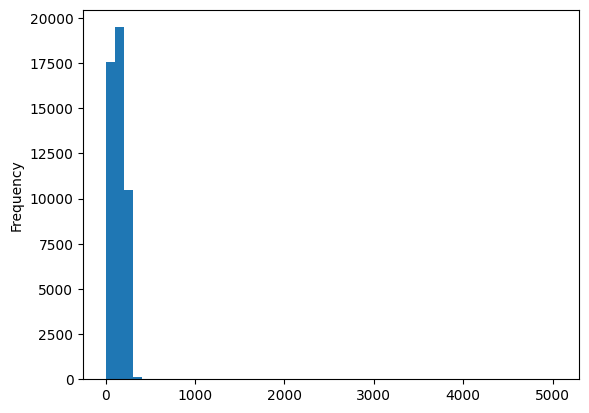

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
data['length'].plot(bins=50, kind='hist')

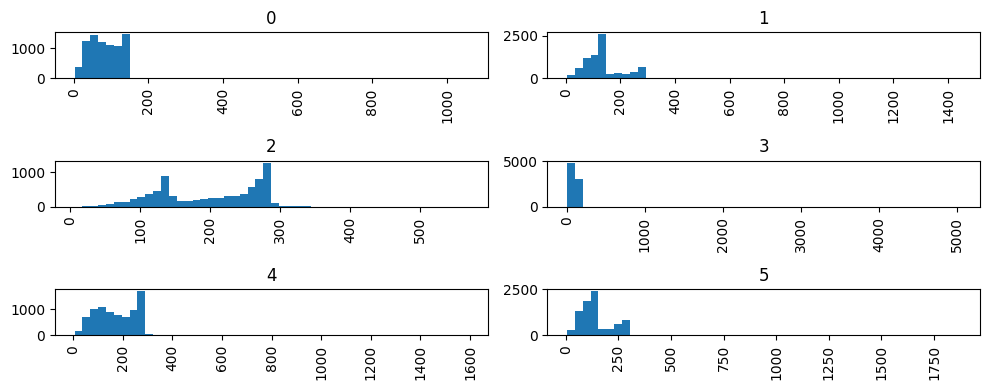

In [23]:
data.hist(column='length', by='cyberbullying_type', bins=50,figsize=(10,4))
plt.tight_layout()

In [24]:
data.tail()

,tweet_text,cyberbullying_type,length
47685,black ppl arent expected anything depended any...,5,234
47686,turner withhold disappointment turner called c...,5,284
47687,swear god dumb nigger bitch got bleach hair re...,5,104
47688,yea fuck rt therealexel youre nigger fucking u...,5,90
47689,bro u got ta chill rt chillshrammy dog fuck kp...,5,76


Random forest Model


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# Split the data into train and test sets
X = data['tweet_text']
y = data['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [35]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8248060390018872
